In [1]:
import numpy as np
from matplotlib import pyplot as plt
from ahrs import filters
from test_data.import_data import get_data, get_gt

weights = [1., 1,]

oleq = filters.oleq.OLEQ(weights=weights)

In [2]:
[acc, _, mag] = get_data()

estimations = np.empty((len(acc), 4))
estimations[0] = [1, 0, 0, 0]

for i in range(len(acc)):
    estimations[i] = oleq.estimate(acc=acc[i], mag=mag[i])

In [3]:
from utils import quaternion_to_euler

def clamp_to_360(x):
    return np.mod(x, 360)

In [4]:
phi_hat, theta_hat, psi_hat = quaternion_to_euler(estimations)

phi, theta, psi = quaternion_to_euler(get_gt())

phi_hat = clamp_to_360(phi_hat)
theta_hat = clamp_to_360(theta_hat)
psi_hat = clamp_to_360(psi_hat)

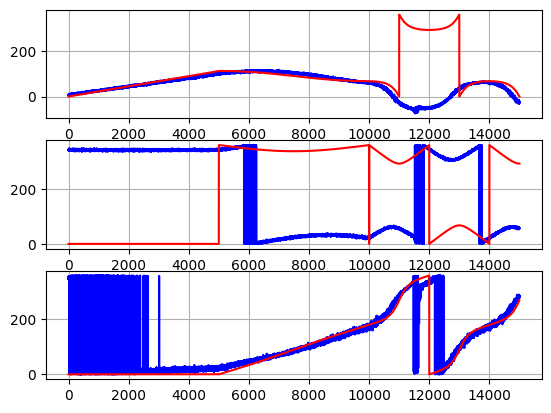

In [5]:
%matplotlib inline

plt.subplot(3, 1, 1)
plt.plot(phi_hat - 180, 'b')
plt.plot(phi, 'r')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(theta_hat, 'b')
plt.plot(theta, 'r')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(360 - psi_hat, 'b')
plt.plot(psi, 'r')
plt.grid()

plt.show()
